In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 

In [2]:
airline = pd.ExcelFile("C:\\Users\\sathya\\Documents\\assignments\\EastWestAirlines.xlsx")
airline = airline.parse(1) 
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
airline.shape

(3999, 12)

In [5]:
airline.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())	/	(i.max()	-	i.min())
    return (x)

# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(airline.iloc[:,2:10])


df_norm.head(10)  # Top 10 rows


,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12
0,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000
1,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000
2,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000
3,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000
4,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472
5,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000
6,0.0,0.50,0.0,0.0,0.104223,0.290698,0.000000,0.000000
7,0.0,0.00,0.0,0.0,0.019910,0.046512,0.008112,0.018868
8,0.0,0.50,0.5,0.0,0.006648,0.500000,0.124931,0.226415
9,0.0,0.50,0.0,0.0,0.107803,0.325581,0.037317,0.056604


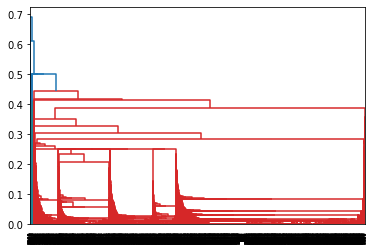

In [7]:
#hierarchical [single linkage]
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [8]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [9]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [10]:
pd.concat([airline,Clusters],axis=1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


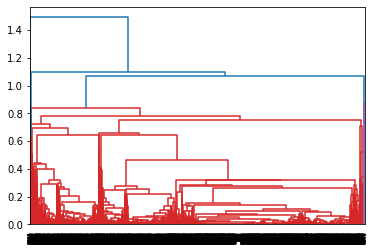

In [18]:
#hierarchical cluster [average linkage and Manhattan Distance]
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

In [19]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'manhattan', linkage = 'average')

In [13]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [14]:
pd.concat([airline,Clusters],axis=1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


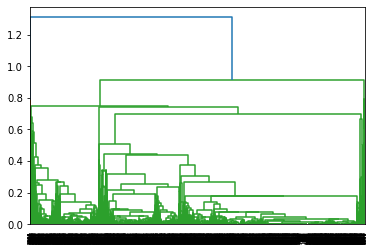

In [20]:
#hierarchical cluster [average linkage and Manhattan Distance]
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='centroid'),)

In [16]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'Minkowski', linkage = 'complete')

In [17]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clustersmin'])

KeyboardInterrupt: 

In [21]:
pd.concat([airline,Clusters],axis=1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


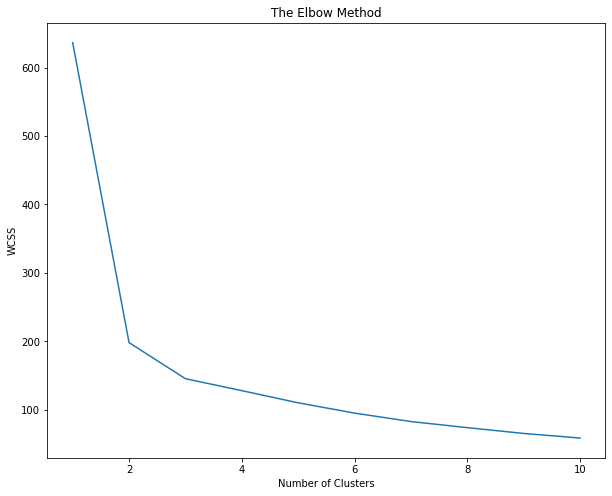

In [22]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [23]:
# Selecting 10 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=4) 
model.fit(df_norm)

model.labels_ # getting the labels of clusters assigned to each row 

array([0, 0, 0, ..., 3, 0, 0])

In [24]:
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
airline['Clusters2']=md # creating a  new column and assigning it to new column 
df_norm.head()
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters2
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [25]:
airline.iloc[:,1:].groupby(airline.Clusters2).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters2
Clusters2,,,,,,,,,,,,
0,44112.302871,92.622488,1.000000,1.000000,1.003828,3213.332536,5.164115,233.010526,0.672249,3717.974641,0.219617,0
1,133516.333333,168.975400,4.354244,1.001230,1.035670,54147.504305,20.627306,637.984010,1.926199,4932.170972,0.644526,1
2,114849.093137,686.250000,1.024510,1.274510,1.009804,12077.681373,22.529412,2913.941176,8.975490,4145.593137,0.558824,2
3,78653.589686,118.117713,2.687220,1.001121,1.011211,17220.411435,15.960762,268.661435,0.774664,4309.412556,0.430493,3


In [26]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=6) 
model.fit(df_norm)

model.labels_ # getting the labels of clusters assigned to each row 

array([0, 0, 0, ..., 1, 0, 0])

In [27]:
md=pd.Series(model.labels_)
# converting numpy array into pandas series object 
airline['Clusters3']=md 
# creating a  new column and assigning it to new column 
df_norm.head()
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters2,Clusters3
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,2


In [28]:
airline.iloc[:,1:].groupby(airline.Clusters3).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters2,Clusters3
Clusters3,,,,,,,,,,,,,
0,43971.979971,97.195408,1.000000,1.000000,1.003908,3152.208109,4.791891,239.410845,0.683439,3717.411334,0.219345,0.003908,0.0
1,84958.265905,111.389886,3.000000,1.001631,1.009788,19944.921697,16.644372,320.564437,0.902121,4324.776509,0.463295,3.000000,1.0
2,108860.137066,154.142857,4.000000,1.001931,1.007722,40056.546332,19.305019,481.270270,1.469112,4734.461390,0.583012,1.000000,2.0
3,85018.317526,351.950515,1.583505,1.000000,1.012371,10905.167010,18.385567,1264.534021,3.901031,4202.802062,0.428866,2.381443,3.0
4,176810.942373,195.020339,4.976271,1.000000,1.084746,78890.271186,22.949153,913.162712,2.728814,5279.335593,0.752542,1.000000,4.0
5,59975.268293,24.390244,1.024390,2.365854,1.000000,13963.560976,17.000000,517.146341,2.024390,3933.560976,0.390244,2.000000,5.0
